In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import random

# Exercise 1

## (a) What is infimum of the total capacity that needs to be removed for no feasible unitary flows from o to d to exist?

## Menger’s Theorem

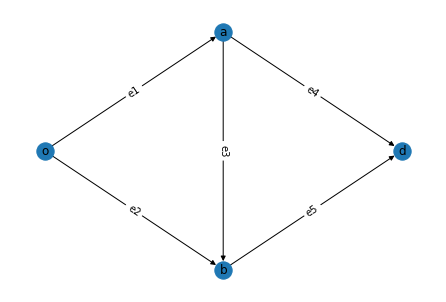

In [2]:
G = nx.DiGraph()

G.add_edges_from([('o','a'),('o','b'),('a','b'),('a','d'),('b','d')], capacity= 1)

pos = {'o':[0,1], 'a':[2,2], 'b':[2,0], 'd':[4,1]}
edge_labels = {('o','a'): 'e1',('o','b'): 'e2',('a','b'): 'e3',('a','d'): 'e4',('b','d'): 'e5'}

nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.savefig("1a.eps",format='eps')

Number of link independent path shows us minimum number of links we need to cut in order to disconnect two nodes. 

In [3]:
len(list(nx.edge_disjoint_paths(G, 'o', 'd')))

2

## (b) Assume that the link capacities are $$ C_1=C_4=3,\ \ \ C_2=C_3=C_5=2 $$ Where should 1 unit of additional capacity be allocated in order to maximize the feasible throughput from o to d? What is the maximal throughput?

In [4]:
# function to set capacities based on array.
c = [3,2,2,3,2]
def set_capacities(G, c):
    nx.set_edge_attributes(G, 
                       {('o','a'): {"capacity": c[0]}, 
                        ('o','b'): {"capacity": c[1]}, 
                        ('a','b'): {"capacity": c[2]},
                        ('a','d'): {"capacity": c[3]},
                        ('b','d'): {"capacity": c[4]}})
set_capacities(G, c)

In [5]:
nx.maximum_flow(G,'o','d')

(5, {'o': {'a': 3, 'b': 2}, 'a': {'b': 0, 'd': 3}, 'b': {'d': 2}, 'd': {}})

In [6]:
max_flow_current = nx.maximum_flow(G,'o','d')[0]

In [7]:
max_flow_ = 1 # variable to compare

for i in range(5):
    cc = c.copy()
    cc[i] = cc[i] + 1
    
    set_capacities(G, cc) # change capacities
    m_flow = nx.maximum_flow(G,'o','d')[0] #find maximum throughput
    
    # get and memorize max flow and its combination. 
    if m_flow > max_flow_:
        max_flow_ = m_flow
        max_i = i+1
    
        max_c = cc

    print('Capacities: ',cc,'  Max throughput: ', m_flow)
    print('Positions of extra capacities:', list(np.array(cc)-np.array(c)), '\n')
    
if max_flow_ == max_flow_current:
    print('There is no change in max throughput. Extra capacity does not matter!')
else:
    print("One of the max flow can be obtained if we put extra capacity to", max_i, " with flow ", max_flow_, "(", max_c, ")")

Capacities:  [4, 2, 2, 3, 2]   Max throughput:  5
Positions of extra capacities: [1, 0, 0, 0, 0] 

Capacities:  [3, 3, 2, 3, 2]   Max throughput:  5
Positions of extra capacities: [0, 1, 0, 0, 0] 

Capacities:  [3, 2, 3, 3, 2]   Max throughput:  5
Positions of extra capacities: [0, 0, 1, 0, 0] 

Capacities:  [3, 2, 2, 4, 2]   Max throughput:  5
Positions of extra capacities: [0, 0, 0, 1, 0] 

Capacities:  [3, 2, 2, 3, 3]   Max throughput:  5
Positions of extra capacities: [0, 0, 0, 0, 1] 

There is no change in max throughput. Extra capacity does not matter!


## (c) Consider link capacities (1). Where should 2 units of additional capacity be allocated in order to maximize the feasible throughput from o to d? Compute all the optimal capacity allocations for this case and the optimal throughput.

In [8]:
max_flow_ = 1

for i in range(5):
    # extra for loop for creating all the combinations
    for j in range(i,5):
        cc = c.copy()
        cc[i] = cc[i] + 1
        cc[j] = cc[j] + 1
        #print(cc)

        set_capacities(G, cc)
        m_flow = nx.maximum_flow(G,'o','d')[0]
        if m_flow > max_flow_:
            max_flow_ = m_flow
            max_i = i+1
            max_j = j+1
            
            max_c = cc

        print('Capacities: ',cc,'  Max throughput: ', m_flow)
        print('Positions of extra capacities:', list(np.array(cc)-np.array(c)), '\n')
    
if max_flow_ == max_flow_current:
    print('There is no change in max throughput. Extra capacity does not matter!')
else:
    print("One of the max flow can be obtained if we put extra capacity to", max_i,', ',  max_j, " with flow ", max_flow_, "(", max_c, ")")

Capacities:  [5, 2, 2, 3, 2]   Max throughput:  5
Positions of extra capacities: [2, 0, 0, 0, 0] 

Capacities:  [4, 3, 2, 3, 2]   Max throughput:  5
Positions of extra capacities: [1, 1, 0, 0, 0] 

Capacities:  [4, 2, 3, 3, 2]   Max throughput:  5
Positions of extra capacities: [1, 0, 1, 0, 0] 

Capacities:  [4, 2, 2, 4, 2]   Max throughput:  6
Positions of extra capacities: [1, 0, 0, 1, 0] 

Capacities:  [4, 2, 2, 3, 3]   Max throughput:  6
Positions of extra capacities: [1, 0, 0, 0, 1] 

Capacities:  [3, 4, 2, 3, 2]   Max throughput:  5
Positions of extra capacities: [0, 2, 0, 0, 0] 

Capacities:  [3, 3, 3, 3, 2]   Max throughput:  5
Positions of extra capacities: [0, 1, 1, 0, 0] 

Capacities:  [3, 3, 2, 4, 2]   Max throughput:  5
Positions of extra capacities: [0, 1, 0, 1, 0] 

Capacities:  [3, 3, 2, 3, 3]   Max throughput:  6
Positions of extra capacities: [0, 1, 0, 0, 1] 

Capacities:  [3, 2, 4, 3, 2]   Max throughput:  5
Positions of extra capacities: [0, 0, 2, 0, 0] 

Capacities

## (d) Consider link capacities (1). Where should 4 units of additional capacity be allocated in order to maximize the feasible throughput from o to d? Compute all the optimal capacity allocations for this case. Among the optimal allocations, select the allocation that maximizes the sum of the cut capacities.

In [9]:
max_flow_ = 1

for i in range(5):
    for j in range(i,5):
        for m in range(j,5):
            for n in range(m,5):
                cc = c.copy()
                cc[i] = cc[i] + 1
                cc[j] = cc[j] + 1
                cc[m] = cc[m] + 1
                cc[n] = cc[n] + 1
                #print(cc)

                set_capacities(G, cc)
                m_flow = nx.maximum_flow(G,'o','d')[0]
                if m_flow > max_flow_:
                    max_flow_ = m_flow
                    max_i = i+1
                    max_j = j+1
                    max_m = m+1
                    max_n = n+1

                    max_c = cc

                print('Capacities: ',cc,'  Max throughput: ', m_flow)
                print('Positions of extra capacities:', list(np.array(cc)-np.array(c)), '\n')
    
if max_flow_ == max_flow_current:
    print('There is no change in max throughput. Extra capacity does not matter!')
else:
    print("One of the max flow can be obtained if we put extra capacity to", max_i,', ',  max_j,', ',  max_m,', ',  max_n, " with flow ", max_flow_, "(", max_c, ")")

Capacities:  [7, 2, 2, 3, 2]   Max throughput:  5
Positions of extra capacities: [4, 0, 0, 0, 0] 

Capacities:  [6, 3, 2, 3, 2]   Max throughput:  5
Positions of extra capacities: [3, 1, 0, 0, 0] 

Capacities:  [6, 2, 3, 3, 2]   Max throughput:  5
Positions of extra capacities: [3, 0, 1, 0, 0] 

Capacities:  [6, 2, 2, 4, 2]   Max throughput:  6
Positions of extra capacities: [3, 0, 0, 1, 0] 

Capacities:  [6, 2, 2, 3, 3]   Max throughput:  6
Positions of extra capacities: [3, 0, 0, 0, 1] 

Capacities:  [5, 4, 2, 3, 2]   Max throughput:  5
Positions of extra capacities: [2, 2, 0, 0, 0] 

Capacities:  [5, 3, 3, 3, 2]   Max throughput:  5
Positions of extra capacities: [2, 1, 1, 0, 0] 

Capacities:  [5, 3, 2, 4, 2]   Max throughput:  6
Positions of extra capacities: [2, 1, 0, 1, 0] 

Capacities:  [5, 3, 2, 3, 3]   Max throughput:  6
Positions of extra capacities: [2, 1, 0, 0, 1] 

Capacities:  [5, 2, 4, 3, 2]   Max throughput:  5
Positions of extra capacities: [2, 0, 2, 0, 0] 

Capacities